In [21]:
import pandas as pd
import seaborn as sns
import pingouin as pg
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
df_Ex1 = pd.read_csv('https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/Notebooks/ANOVA/data_Experiment_1.csv')
df_Ex1.head()

,Unnamed: 0,ID,sender,duration,prime,target,condition,soa_condition,congruence,correct,frequency_target
0,0,2215,target,865.791,paint,PAINT,Con_Synth,short,congruent,True,3.2737
1,3,2215,target,710.994,fern,PETAL,Inc_Nat_Nat,short,incongruent,True,1.6628
2,4,2215,target,598.582,tiger,TIGER,Con_Nat,short,congruent,True,2.9759
3,6,2215,target,614.026,frog,FROG,Con_Nat,short,congruent,True,2.7810
4,7,2215,target,756.676,peach,SHED,Inc_Nat_Synth,short,incongruent,True,2.7490


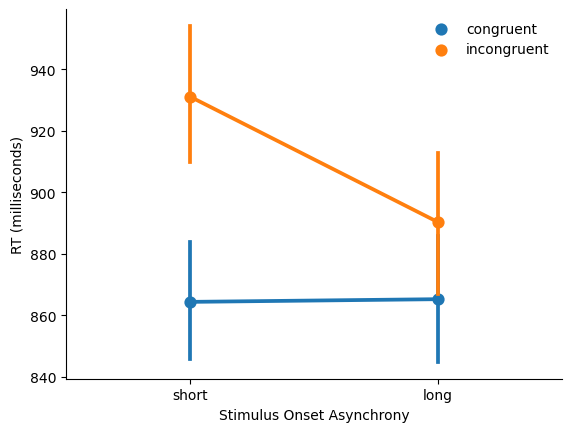

In [6]:
ax = sns.pointplot(data = df_Ex1, x = 'soa_condition', y = 'duration', hue = 'congruence')  # make the plot
ax.set(xlabel='Stimulus Onset Asynchrony', ylabel='RT (milliseconds)')                  # give the axes more understandable labels
plt.legend(frameon = False)                                                             # remove the box and move the legend so it doesn't obscure the data
sns.despine()     

In [8]:
df_Ex1_agg = df_Ex1.groupby(['ID', 'congruence', 'soa_condition']).mean().reset_index()    # get aggregated data (RT means per participant per condition)
df_Ex1_agg

/var/folders/6m/mwt0c30539b1zrk5vf14dpr44pd98r/T/ipykernel_13265/2342758122.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_Ex1_agg = df_Ex1.groupby(['ID', 'congruence', 'soa_condition']).mean().reset_index()    # get aggregated data (RT means per participant per condition)


,ID,congruence,soa_condition,Unnamed: 0,duration,correct,frequency_target
0,2181,congruent,long,3810.730769,739.411231,1.0,2.312877
1,2181,congruent,short,3748.153846,716.535808,1.0,2.986758
2,2181,incongruent,long,3805.086957,690.155261,1.0,2.955370
3,2181,incongruent,short,3749.238095,758.190714,1.0,2.383200
4,2182,congruent,long,3693.875000,777.133417,1.0,2.287117
...,...,...,...,...,...,...,...
121,2214,incongruent,short,202.300000,696.890350,1.0,2.349010
122,2215,congruent,long,87.769231,657.766692,1.0,2.361623
123,2215,congruent,short,33.363636,800.824318,1.0,2.990236
124,2215,incongruent,long,92.208333,710.101125,1.0,2.950254


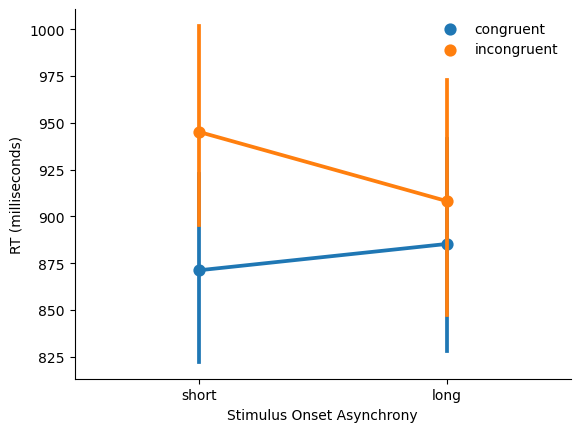

In [10]:
order = ['short', 'long']  
ax = sns.pointplot(data = df_Ex1_agg, x = 'soa_condition', y = 'duration', hue = 'congruence', order=order)  # make the plot
ax.set(xlabel='Stimulus Onset Asynchrony', ylabel='RT (milliseconds)')                  # give the axes more understandable labels
plt.legend(frameon = False)                                                             # remove the box and move the legend so it doesn't obscure the data
sns.despine()   

In [34]:

short_cong = df_Ex1_agg.loc[((df_Ex1_agg['soa_condition'] == 'short') & (df_Ex1_agg['congruence'] == 'congruent'))]['duration']
short_incong = df_Ex1_agg.loc[((df_Ex1_agg['soa_condition'] == 'short') & (df_Ex1_agg['congruence'] == 'incongruent'))]['duration']

print('congruent:', short_cong.mean())
print('incongruent:', short_incong.mean())
print('difference:', short_incong.mean() - short_cong.mean())

pg.ttest(short_cong, short_incong, paired=True)


congruent: 871.2120803324187
incongruent: 945.1848620830319
difference: 73.9727817506132


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.184775,31,two-sided,0.000218,"[-110.02, -37.92]",0.4931,126.741,0.770995


In [ ]:
# Family-wise error rate

alpha = 0.05
number_of_compairisons = 3

fwer = 1-((1-alpha)**number_of_compairisons)
print('Family-wise error rate:', round(fwer, 4))

In [35]:
# Repeated-measures ANOVA
# Note! pg.rm_anova wants the FULL dataset, not the aggregated one!

pg.rm_anova(data=df_Ex1, dv='duration', within=['congruence', 'soa_condition'], subject='ID')

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,congruence,67971.848080,1,30,67971.848080,19.999219,0.000103,0.000103,0.022095,1.0
1,soa_condition,335.661786,1,30,335.661786,0.041481,0.839988,0.839988,0.000112,1.0
2,congruence * soa_condition,17755.455736,1,30,17755.455736,3.125388,0.087252,0.087252,0.005867,1.0


We conducted a repeated-measures 2-way analysis of variance. There was a main effect of congruence (F(1,30) = 19.99, p = 0.000103). There was no main effect of soa length (F(1,30) = 335.6, p = 0.83). There was no interaction effect between congruence and soa length (F(1,30 = 3.12, p = 0.087252)).